# Importing Required Libraries 
Numpy For Numerical Scientific Computing |
Pandas For Data Manipulations |
Tweepy For data Fetch From Twitter Api |
VaderSentiment For Finding The Polarity Scores of words |
nltk For wordnet and pre proprocessing the text |


In [1]:
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
from collections import Counter
import re
from matplotlib import pyplot as plt
import json
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
!pip show tweepy

Name: tweepy
Version: 3.7.0
Summary: Twitter library for python
Home-page: http://github.com/tweepy/tweepy
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /opt/anaconda3/lib/python3.8/site-packages
Requires: requests-oauthlib, requests, PySocks, six
Required-by: 


# To Scrape the Data From Twitter Api As per the hashtag and Date

In [19]:
def scrape(words, date_since, numtweet): 
    print(1)
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text',  'hashtags']) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en",since=date_since, tweet_mode='extended').items(numtweet) 

    print(tweets)
    
#     for i in tweets:
#         print(i)
    list_tweets = [tweet for tweet in tweets] 
 
    i = 1  
      
    for tweet in list_tweets:
    
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
    
        try: 
            text = tweet.retweeted_status.full_text
        
        except AttributeError: 
            text = tweet.full_text
            
        hashtext = list() 
        for j in range(0, len(hashtags)):
            
            hashtext.append(hashtags[j]['text']) 
    
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 

        # Function call to print tweet data on screen 
#         print(tweetdata(i, ith_tweet))
        
        i = i+1
    
    filename = 'scraped_tweets2.csv'
    
    db

    db.to_csv(filename) 
    print("Done----------")

if __name__ == '__main__': 
    #Storing Twitter Keys in variables
    #consumer_key = 'AaBb3BBnAQOHtqjuEtaq0SXOY'
    #consumer_secret = 'IZkGlvcsiqevFPBO7E0Kmo466PVQlD95AVcHyFAsGb8GtZEfKy'
    #access_key = '1321309664772907008-pRJLxNzx1UddghW6GRfcUmYYbwbwYY'
    #access_secret = 'p0jDJk4C77p4gInXpa7KrOZzJEhTym2myFjTiZ1afRoWj'
    
    
    consumer_key = 'hC02vDfkSX1IBYOZPRjCpgXCm'
    consumer_secret = 'Pm080QkpceLW3Q1RKBRIIZDI3Nn1khMogxUeB2KyJjFqIamr6i'
    access_key = '1321309664772907008-NT3w9KrGuT4BzsCKHdiFEgq8HamZ9B'
    access_secret = 'fkudHFKdUlbkaGLUwnNGeEU2MxpPVKC1nqkEGpVmAqk3S'
    
#     consumer_key = '5bloZwJga9Xu8f7FHvjizoVnz'
#     consumer_secret = 'ZmjIXjrLn7IH3yFO86uoU1WoeY4AsE3Q10ZbjDa7DIZOW5V2EL'
#     access_key = '2960397948-c81vy3mf6lG3rb3tafDKEki0J3RyyYAindujobw'
#     access_secret = 'dNZVRIy7EAKaJm1HN2lXY9QS8ZGspOYY248jXrXsdE01Z'
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet = 500  
    scrape(words, date_since, numtweet) 
    print('Scraping has completed!') 


Enter Twitter HashTag to search for
Blacklivesmatter
Enter Date since The Tweets are required in yyyy-mm--dd
2020-01-01
1
Done----------
Scraping has completed!


# Loading The Contractions.json For Conversion Like are 
  "ain't": "am not" |
  "aren't": "are not"

In [20]:

with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict

# Reading The Scraped Tweets Which Extracted From The Api

In [21]:
import pandas as pd
data= pd.read_csv("scraped_tweets2.csv")
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,AyoAkinwo,"Award Winning Tele Person, World Record Swimme...",Worldwide,1811,8209,17001,0,Delighted to be working with @santanderuk Univ...,"['blacklivesmatter', 'racism', 'sport', 'change']"
1,1,JFSebastian146,#wordpress #wp #digitalmarketing #endracism #B...,NaN,6170,15504,864224,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER']
2,2,PennyJTH,"5-18-2017 MY 3RD TWITTER ACCOUNT! LOVE GOD, FA...",NaN,4999,1646,225661,3,"The Fayetteville, NC city releases 3 videos 🎥 ...",['JasonWalker']
3,3,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER']
4,4,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,1,reminder that #blacklivesmatter,['blacklivesmatter']


# Finding Sentiments From The Emojis For Sarcastic comments

In [22]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

# Pre-Processing the Tweets Using Regular Expression 

In [23]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [24]:
data['processed_tweet'] = np.vectorize(process_tweet)(data['text'])
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,AyoAkinwo,"Award Winning Tele Person, World Record Swimme...",Worldwide,1811,8209,17001,0,Delighted to be working with @santanderuk Univ...,"['blacklivesmatter', 'racism', 'sport', 'change']",delighted to be working with universities and ...
1,1,JFSebastian146,#wordpress #wp #digitalmarketing #endracism #B...,NaN,6170,15504,864224,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER'],today is going to be great day blacklivesmatte...
2,2,PennyJTH,"5-18-2017 MY 3RD TWITTER ACCOUNT! LOVE GOD, FA...",NaN,4999,1646,225661,3,"The Fayetteville, NC city releases 3 videos 🎥 ...",['JasonWalker'],the fayetteville nc city releases videos on th...
3,3,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER'],today is going to be great day blacklivesmatte...
4,4,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,1,reminder that #blacklivesmatter,['blacklivesmatter'],reminder that blacklivesmatter


# Sample Data After Pre-Processing The Tweets

In [25]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [delighted, to, be, working, with, universitie...
1    [today, is, going, to, be, great, day, blackli...
2    [the, fayetteville, nc, city, releases, videos...
3    [today, is, going, to, be, great, day, blackli...
4                   [reminder, that, blacklivesmatter]
Name: processed_tweet, dtype: object

# Using lemmatizer For converting Words to  Root words like Changing:change | Playing:Play

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [delighted, to, be, working, with, university,...
1    [today, is, going, to, be, great, day, blackli...
2    [the, fayetteville, nc, city, release, video, ...
3    [today, is, going, to, be, great, day, blackli...
4                   [reminder, that, blacklivesmatter]
Name: processed_tweet, dtype: object

# Removing Stopwords

In [27]:
stopwords = nltk.corpus.stopwords.words('english')
for i in range(len(tokenized_tweet)):

     tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
     
data['processed_tweet'] = tokenized_tweet
data.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,AyoAkinwo,"Award Winning Tele Person, World Record Swimme...",Worldwide,1811,8209,17001,0,Delighted to be working with @santanderuk Univ...,"['blacklivesmatter', 'racism', 'sport', 'change']",delighted to be working with university and th...
1,1,JFSebastian146,#wordpress #wp #digitalmarketing #endracism #B...,NaN,6170,15504,864224,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER'],today is going to be great day blacklivesmatte...
2,2,PennyJTH,"5-18-2017 MY 3RD TWITTER ACCOUNT! LOVE GOD, FA...",NaN,4999,1646,225661,3,"The Fayetteville, NC city releases 3 videos 🎥 ...",['JasonWalker'],the fayetteville nc city release video on the ...
3,3,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,2,TODAY IS GOING TO BE A GREAT DAY!💗💗 \n\n#BLACK...,['BLACKLIVESMATTER'],today is going to be great day blacklivesmatte...
4,4,DavidUdale,INTRODUCTION\n👷 Mechanical engineer\n⚽ Die har...,somewhere around the sun,1573,1797,106509,1,reminder that #blacklivesmatter,['blacklivesmatter'],reminder that blacklivesmatter


# To Find The Polarity Scores For Each Tweet

In [28]:
analyzer = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(snt)))
          

data['neg'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['processed_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
data[['processed_tweet','neg','pos','compound']].head()

,processed_tweet,neg,pos,compound
0,delighted to be working with university and th...,0.133,0.284,0.5647
1,today is going to be great day blacklivesmatte...,0.000,0.291,0.6249
2,the fayetteville nc city release video on the ...,0.108,0.000,-0.5574
3,today is going to be great day blacklivesmatte...,0.000,0.291,0.6249
4,reminder that blacklivesmatter,0.000,0.000,0.0000


# Label The Tweet as per the Compound Score

In [29]:
def getAnalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

data['sentiment'] = data['compound'].apply(getAnalysis)
# Show the dataframe
data[['processed_tweet','neg','pos','compound','sentiment']].head()

,processed_tweet,neg,pos,compound,sentiment
0,delighted to be working with university and th...,0.133,0.284,0.5647,positive
1,today is going to be great day blacklivesmatte...,0.000,0.291,0.6249,positive
2,the fayetteville nc city release video on the ...,0.108,0.000,-0.5574,negative
3,today is going to be great day blacklivesmatte...,0.000,0.291,0.6249,positive
4,reminder that blacklivesmatter,0.000,0.000,0.0000,neutral


# Total Tweets for Positive,Negative and Neutral

In [30]:
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
slices

[233, 187, 80]

# Graphical Representation of Words Containing Hate or Toxic Speech w.r.t Positive and Neutral Sentiment

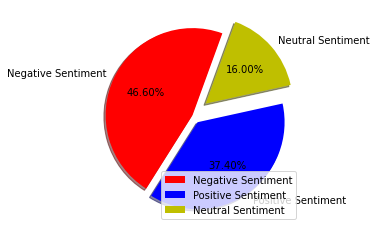

In [31]:
sentiments = ['Negative Sentiment','Positive Sentiment', 'Neutral Sentiment'] 
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
colors = ['r','b','y'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,
        explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%') 
plt.legend(loc = "lower right")
plt.show() 

# Divide into number of classes For Finding The probability

In [32]:
n_class = 3
n_tweet = 500

if n_class == 2:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = data.copy()[data.sentiment == 'neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)


# Dividing The Training And Testing Data To find The Accuracy of Algorithm

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'], test_size=0.33, random_state=0)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['processed_tweet'] = X_train
df_train['sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['processed_tweet'] = X_test
df_test['sentiment'] = y_test
df_test = df_test.reset_index(drop=True)
df_test

,processed_tweet,sentiment
0,white boy saying the word to person of colour ...,negative
1,being black in america mean being consumed wit...,neutral
2,allivesmatter blacklivesmatter wow amazing won...,positive
3,how do you support racist just wanna know twit...,negative
4,what are you reading racism endracism stopraci...,negative
...,...,...
160,geez white privilege much this lady is so enti...,positive
161,thank heaven stumbled across this tweet of you...,negative
162,no black creator influencers made ticktock lis...,negative
163,black brawling in public again truly and deepl...,positive


# Applying Naive Bayes Classifier For our Processed Tweet and Sentiment ALbel

In [34]:

class TweetNBClassifier(object):

    def __init__(self, df_train):
        self.df_train = df_train
        self.df_pos = df_train.copy()[df_train.sentiment == 'positive']
        self.df_neg = df_train.copy()[df_train.sentiment == 'negative']
        self.df_neu = df_train.copy()[df_train.sentiment == 'neutral']

    def fit(self):
        Pr_pos = df_pos.shape[0]/self.df_train.shape[0]
        Pr_neg = df_neg.shape[0]/self.df_train.shape[0]
        Pr_neu = df_neu.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.df_pos['processed_tweet'].tolist()).split()
        self.neg_words = ' '.join(self.df_neg['processed_tweet'].tolist()).split()
        self.neu_words = ' '.join(self.df_neu['processed_tweet'].tolist()).split()

        all_words = ' '.join(self.df_train['processed_tweet'].tolist()).split()

        self.vocab = len(Counter(all_words))

        wc_pos = len(' '.join(self.df_pos['processed_tweet'].tolist()).split())
        wc_neg = len(' '.join(self.df_neg['processed_tweet'].tolist()).split())
        wc_neu = len(' '.join(self.df_neu['processed_tweet'].tolist()).split())
        self.word_count = (wc_pos, wc_neg, wc_neu)
        return self


    def predict(self, df_test):
        class_choice = ['positive', 'negative', 'neutral']

        classification = []
        for tweet in df_test['processed_tweet']:
            text = tweet.split()

            val_pos = np.array([])
            val_neg = np.array([])
            val_neu = np.array([])
            for word in text:
                tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                val_pos = np.append(val_pos, tmp_pos)
                val_neg = np.append(val_neg, tmp_neg)
                val_neu = np.append(val_neu, tmp_neu)

            val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
            val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
            val_neu = np.log(self.Prior[2]) + np.sum(val_neu)

            probability = (val_pos, val_neg, val_neu)
            classification.append(class_choice[np.argmax(probability)])
        return classification


    def score(self, feature, target):

        compare = []
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                tmp ='correct'
                compare.append(tmp)
            else:
                tmp ='incorrect'
                compare.append(tmp)
        r = Counter(compare)
        accuracy = r['correct']/(r['correct']+r['incorrect'])
        return accuracy

# Calling Functions to Evaluate the Model 

In [35]:
tnb = TweetNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
score = tnb.score(predict,df_test.sentiment.tolist())
print(score)

0.7757575757575758
